**Customer Retention Plan for Telecommunications** (Sep 2025)

A telecommunications company is facing a high churn rate. Therefore, a predictive model is proposed to determine the probability of churn based on the variables most highly correlated with the target variable, Churn.

A database containing information on 3,150 clients (both active and those who have left the company) has been provided. The variables considered for the analysis and predictions are:

*   Call Failure
*   Complaints
*   Subscription Length
*   Charge Amount
*   Seconds of Use
*   Frequency of Use
*   Frequency of SMS
*   Distinct Called Numbers
*   Age Group
*   Tariff Plan
*   Status
*   Age
*   Customer Value













In [3]:
#Load a dataset into a DataFrame:
import pandas as pd
df = pd.read_csv('/content/sample_data/Customer Churn.csv')

In [4]:
#Explore the DataFrame:
print(df.head())
print('Shape',df.shape) #Dataframe dimensions (#rows, #columns)

   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3    

**Exploratory Data Analysis (EDA):**

In this step, we explore the dataset to understand its structure, identify patterns, detect outliers, and analyze relationships between variables, especially with the target variable 'Churn'. This analysis will guide feature selection and preprocessing for the predictive models.


In [5]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=528601517adbe1835906cd765deb523894ab43939539da245be0d9f3443432a8
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      

In [7]:
# Import the ProfileReport class from ydata-profiling
from ydata_profiling import ProfileReport

In [42]:
# Create a descriptive profile report of the dataset
profile = ProfileReport(df, title="Reporte Descriptivo del Dataset", explorative=True)

# # Display the statistical summary of the dataset as an interactive iframe in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 45.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

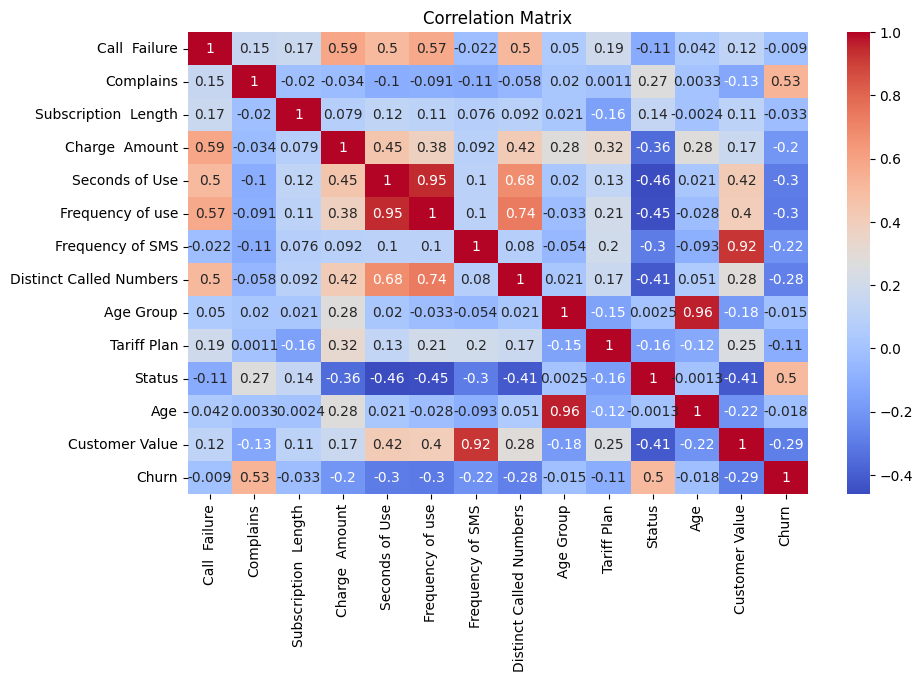

In [9]:
# Generate a more quantitative heatmap to avoid ambiguity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heat map or correlation matrix shows that the variables with the highest linear correlation with the target variable Churn are:

*   Complaints
*   Status
*   Frequency of Use
*   Seconds of Use

In [10]:
# Remove duplicate rows from the DataFrame:
df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados.shape)

(2850, 14)


In [ ]:
# Calculate the percentage of clients who have left the service (Churn = 1):
porcentaje_churn_1 = df_sin_duplicados['Churn'].mean() * 100

# Calculate the percentage of clients who are still using the service (Churn = 0):
porcentaje_churn_0 = 100 - porcentaje_churn_1

print(f"Churn = 1: {porcentaje_churn_1:.2f}%")
print(f"Churn = 0: {porcentaje_churn_0:.2f}%")

Churn = 1: 15.65%
Churn = 0: 84.35%


**Feature Engineering**

Creation of synthetic variables.

Since Seconds of Use and Frequency of Use are the variables with the highest correlation with the target variable Churn, Frequency of Use was transformed into Frequency of Use per Month to reduce collinearity and obtain a more representative metric.

Additionally, a new variable, Charge Amount per Month, was created to evaluate whether it could exhibit a stronger correlation with the target variable Churn.

In [12]:
import numpy as np

# Create synthetic variables to account for monthly metrics:

df_sin_duplicados['ChargePerMonth'] = df_sin_duplicados['Charge  Amount'] / df_sin_duplicados['Subscription  Length'].replace(0, np.nan)
df_sin_duplicados['FrequencyPerMonth'] = df_sin_duplicados['Frequency of use'] / df_sin_duplicados['Subscription  Length'].replace(0, np.nan)

/tmp/ipython-input-522233452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['ChargePerMonth'] = df_sin_duplicados['Charge  Amount'] / df_sin_duplicados['Subscription  Length'].replace(0, np.nan)
/tmp/ipython-input-522233452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['FrequencyPerMonth'] = df_sin_duplicados['Frequency of use'] / df_sin_duplicados['Subscription  Length'].replace(0, np.nan)


**Boxplots**

Boxplots were created to identify specific differences between clients who leave the service (Churn = 1) and clients who continue with the service (Churn = 0).

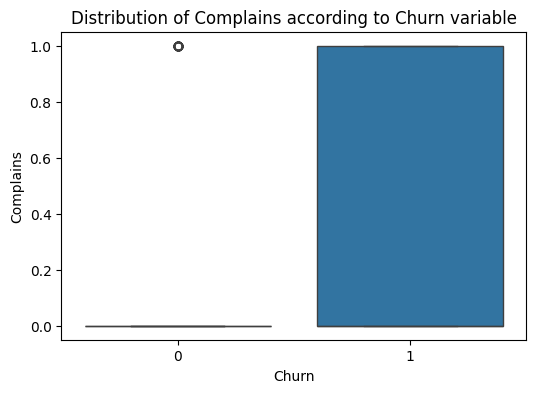

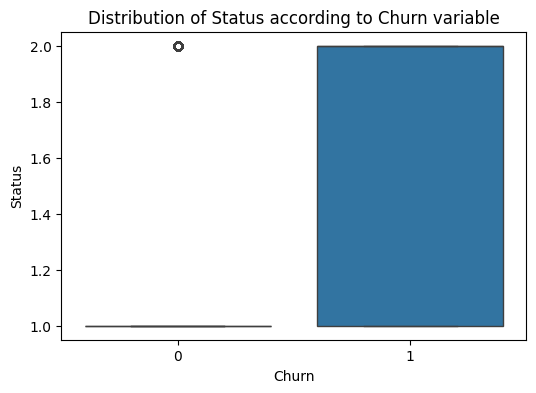

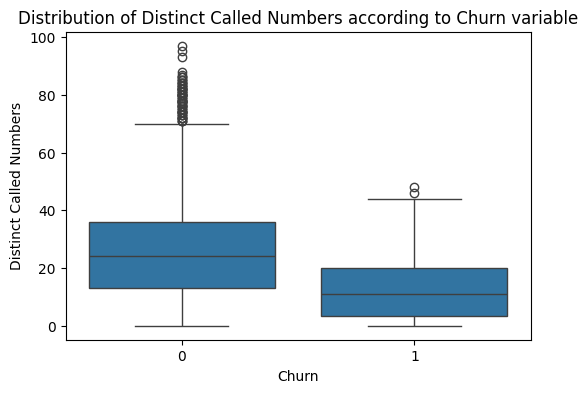

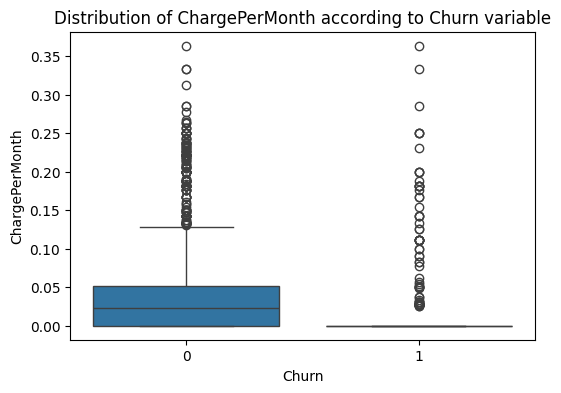

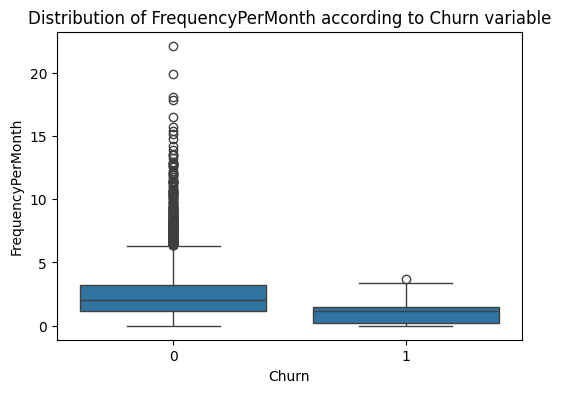

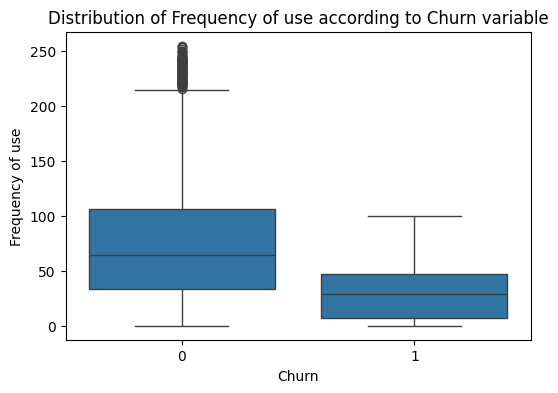

In [14]:
# Create boxplots for selected features to compare distributions based on Churn

features = ['Complains','Status','Distinct Called Numbers', 'ChargePerMonth', 'FrequencyPerMonth','Frequency of use']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df_sin_duplicados)
    plt.title(f'Distribution of {col} according to Churn variable')
    plt.show()

Observations from the Boxplots:

* Clients who leave the service have Complaints values higher than 1, while the others have no complaints at all (Complaints = 0).
* The variable Status has a predominant value of 2 for clients who leave the service, while clients who continue with the service have a value of 0.
* Clients who leave the service have a mean Frequency of Use lower than 50, while clients who continue with the service have a mean value greater than 50.
* Clients who leave the service have a Frequency of Use per Month lower than 2.5, while clients who continue with the service have values between 2.5 and 5.5.
* Clients who leave the service have a Charge Amount per Month lower than 0.25, while clients who continue with the service have values between 0.25 and 0.5.

The synthetic variables created do not have a strong signal to differentiate clients who leave from clients who continue with the service. The variables that retain a stronger signal are:

* Complaints
* Status
* Distinct Called Numbers
* Frequency of Use

To confirm which variables are the most relevant for predicting the target variable Churn, a Decision Tree model was trained using the sklearn.tree library in Python, with the following parameter settings to optimize execution time without sacrificing model performance:

* max_depth = 4
* random_state = 42
* Using 20% of the data for training









In [15]:
# Import Decision Tree classifier and plotting function from scikit-learn:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)

X = df_sin_duplicados[['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value','ChargePerMonth','FrequencyPerMonth']]
y = df_sin_duplicados['Churn']

#We divide the dataset between test and train data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict the target variable using the trained Decision Tree
y_pred = tree.predict(X_test)

# Print classification metrics
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC-AUC score
y_pred_proba = tree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       479
           1       0.88      0.63      0.73        91

    accuracy                           0.93       570
   macro avg       0.90      0.80      0.84       570
weighted avg       0.92      0.93      0.92       570

Confusion Matrix:
 [[471   8]
 [ 34  57]]
ROC-AUC: 0.9161256280254193


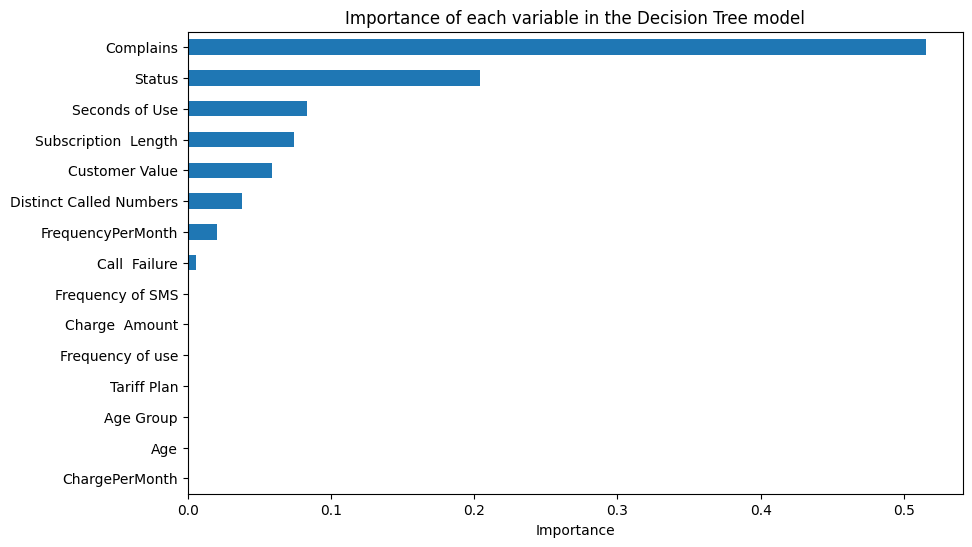

Complains                  0.515495
Status                     0.204275
Seconds of Use             0.083197
Subscription  Length       0.074244
Customer Value             0.059051
Distinct Called Numbers    0.038094
FrequencyPerMonth          0.020253
Call  Failure              0.005390
Frequency of SMS           0.000000
Charge  Amount             0.000000
Frequency of use           0.000000
Tariff Plan                0.000000
Age Group                  0.000000
Age                        0.000000
ChargePerMonth             0.000000
dtype: float64


In [20]:
# Analyze the importance of each feature in the trained Decision Tree model

importances = pd.Series(tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
importances.plot(kind='barh', figsize=(10, 6))
plt.xlabel("Importance")
plt.title("Importance of each variable in the Decision Tree model")
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.show()

# Display feature importances
print(importances)

Based on the heat map, the boxplots, and the Decision Tree model, the variables most correlated with the target variable Churn were identified as Complaints and Status.

However, other variables such as Call Failure, Distinct Called Numbers, Customer Value, Subscription Length, Seconds of Use, as well as the synthetic variable Frequency of Use per Month, also proved to be relevant for predicting whether clients will stay or leave the service.

**Machine Learning Approaches for Churn Prediction**

Two machine learning models were evaluated to predict the probability of customer churn (Churn = 1), using the variables selected during the exploratory analysis: Random Forest and Logistic Regression.

* **Random Forest:** trained without scaling the variables, using 30% of the data for testing. It was configured with `n_estimators = 150` and `random_state = 42`.

* **Logistic Regression:** the continuous numerical variables (Call Failure, Subscription Length, Seconds of Use, FrequencyPerMonth, Distinct Called Numbers, Customer Value) were scaled. The model was trained using 30% of the data, with `max_iter = 1000` and `solver = 'liblinear'`.

In [32]:
# Random Forest for Churn Prediction
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X_1 = df_sin_duplicados[['Call  Failure','Complains','Subscription  Length','Seconds of Use','FrequencyPerMonth','Distinct Called Numbers','Status','Customer Value']]
y_1 = df_sin_duplicados['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier (n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.85      0.77      0.80       132

    accuracy                           0.94       855
   macro avg       0.90      0.87      0.89       855
weighted avg       0.94      0.94      0.94       855

Matriz de confusión:
 [[705  18]
 [ 31 101]]
ROC-AUC: 0.9712267907288654


In [33]:
#Logistic Regression for Churn Prediction

# Define features and target variable:
X_2 = df_sin_duplicados[['Call  Failure','Complains','Subscription  Length','Seconds of Use','FrequencyPerMonth','Distinct Called Numbers','Status','Customer Value']]
y_2 = df_sin_duplicados['Churn']

# Scale continuous numerical variables to improve model performance:
columnas_a_escalar = ['Call  Failure','Subscription  Length','Seconds of Use','FrequencyPerMonth','Distinct Called Numbers','Customer Value']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_2_scaled_values = scaler.fit_transform(X_2[columnas_a_escalar])

# Create a new DataFrame with scaled values
X_2_scaled_df = pd.DataFrame(X_2_scaled_values, columns=columnas_a_escalar, index=X_2.index)

# Concatenate non-scaled binary variables:
X_2_final = pd.concat([X_2_scaled_df, X_2[['Complains', 'Status']]], axis=1)
print(X_2_final.head())

# Since Complains and Status are binary variables, Logistic Regression can correctly interpret
# that each category represents a distinct condition. Therefore, one-hot encoding is not required.

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_2_final, y_2, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=1000, solver='liblinear')
model_1.fit(X_train, y_train)

# Predict on the test set:
y_pred = model_1.predict(X_test)
y_pred_prob = model_1.predict_proba(X_test)[:, 1]

# Print model evaluation metrics:
print(classification_report(y_test, y_pred))
print('ROC‑AUC:', roc_auc_score(y_test, y_pred_prob))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))

   Call  Failure  Subscription  Length  Seconds of Use  FrequencyPerMonth  \
0       0.026969              0.636013       -0.039115          -0.226229   
1      -1.065198              0.750672       -1.004112          -0.958353   
2       0.300011              0.521355       -0.495655          -0.330059   
3       0.300011              0.636013       -0.080077          -0.281585   
4      -0.655636              0.636013       -0.509944          -0.370155   

   Distinct Called Numbers  Customer Value  Complains  Status  
0                -0.399660       -0.539223          0       1  
1                -1.155874       -0.833972          0       2  
2                 0.007532        2.063820          0       1  
3                 0.647405       -0.456828          0       1  
4                 0.531064       -0.640000          0       1  
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       723
           1       0.72      0.44      0.54 

In this comparison, the Random Forest model outperformed Logistic Regression across all evaluation metrics, particularly in Recall and F1-Score, indicating a better balance between precision and sensitivity for detecting customers who churn.


**Handling Imbalanced Classes with SMOTE-TOMEK**

Since the target variable Churn is significantly imbalanced (more customers remain in the service than leave it), the initial models could show high accuracy without necessarily improving their ability to identify churn cases.

To address this issue, the SMOTE-TOMEK technique was applied, which combines oversampling of the minority class (SMOTE) with the removal of close and redundant samples (Tomek links), using the `SMOTETomek` class from `imblearn.combine`. Additionally, a third model was added as an option to predict churn cases.

* **Random Forest:** 20% of the data used for testing, `n_estimators = 150`, `random_state = 42`.  
* **Logistic Regression:** numerical variables scaled, 20% of the data used for testing, `max_iter = 1000`, `solver = 'liblinear'`.  
* **Decision Tree:** `max_depth = 4`, `random_state = 42`.

In [34]:
from imblearn.combine import SMOTETomek

In [35]:
# Variables for the Random Forest model (non-scaled variables):
X_3 = df_sin_duplicados[['Call  Failure','Complains','Subscription  Length','Seconds of Use','FrequencyPerMonth','Distinct Called Numbers','Status','Customer Value']]
y_3 = df_sin_duplicados['Churn']

#Variables for Logistic Regression model (numeric variables escalated):
X_3_escaladas = X_2_final

In [36]:
# Create SMOTETomek object:
smote_tomek = SMOTETomek(random_state=42)

# Apply SMOTE-TOMEK to balance the classes in the Random Forest dataset:
X_arboles_resampled, y_arboles_resampled = smote_tomek.fit_resample(X_3, y_3)

# Split the balanced dataset into training and test sets
X_logistic_resampled, y_logistic_resampled = smote_tomek.fit_resample(X_3_escaladas, y_3)

#Results:
print("Original:", X_3.shape, y_3.value_counts())
print("Balanced Random Forest model", X_arboles_resampled.shape, y_arboles_resampled.value_counts())
print("Balanced Logistic Regression model", X_logistic_resampled.shape, y_logistic_resampled.value_counts())

Original: (2850, 8) Churn
0    2404
1     446
Name: count, dtype: int64
Balanced Random Forest model (4662, 8) Churn
0    2331
1    2331
Name: count, dtype: int64
Balanced Logistic Regression model (4776, 8) Churn
0    2388
1    2388
Name: count, dtype: int64


In [46]:
# Logistic Regression model with balanced classes using SMOTE-TOMEK:

# Split the balanced dataset into training and test sets (stratified):
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic_resampled, y_logistic_resampled, test_size=0.2, random_state=42, stratify=y_logistic_resampled)

# Train Logistic Regression:
model_4 = LogisticRegression(max_iter=1000, solver='liblinear')
model_4.fit(X_train_logistic, y_train_logistic)

# Predict:
y_pred_logistic = model_4.predict(X_test_logistic)
y_pred_prob_logistic = model_4.predict_proba(X_test_logistic)[:, 1]

# Evaluation:
print(classification_report(y_test_logistic, y_pred_logistic))
print("ROC-AUC:", roc_auc_score(y_test_logistic, y_pred_prob_logistic))
print("Matriz de confusión:\n", confusion_matrix(y_test_logistic, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       478
           1       0.84      0.91      0.88       478

    accuracy                           0.87       956
   macro avg       0.87      0.87      0.87       956
weighted avg       0.87      0.87      0.87       956

ROC-AUC: 0.9218041525883651
Matriz de confusión:
 [[396  82]
 [ 41 437]]


In [38]:
# Random Forest model with balanced classes (SMOTE-TOMEK):
X_train_arbol, X_test_arbol, y_train_arbol, y_test_arbol = train_test_split(X_arboles_resampled, y_arboles_resampled, test_size=0.2, random_state=42, stratify=y_arboles_resampled)

model_5 = RandomForestClassifier (n_estimators=150, random_state=42)
model_5.fit(X_train_arbol, y_train_arbol)

y_pred_arbol = model_5.predict(X_test_arbol)

# Classification Report:
print(classification_report(y_test_arbol, y_pred_arbol))

# Confusion Matrix:
print("Matriz de confusión:\n", confusion_matrix(y_test_arbol, y_pred_arbol))

# ROC-AUC score:
y_pred_proba_arbol = model_5.predict_proba(X_test_arbol)[:, 1]
roc_auc = roc_auc_score(y_test_arbol, y_pred_proba_arbol)
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       467
           1       0.95      0.98      0.97       466

    accuracy                           0.97       933
   macro avg       0.97      0.97      0.97       933
weighted avg       0.97      0.97      0.97       933

Matriz de confusión:
 [[442  25]
 [  7 459]]
ROC-AUC: 0.9879286101588994


In [47]:
# Decision Tree model with balanced classes (SMOTE-TOMEK):

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_arbol, y_train_arbol)

y_pred_dt = tree.predict(X_test_arbol)
y_pred_proba_dt = tree.predict_proba(X_test_arbol)[:, 1]

# Evaluation
print(classification_report(y_test_arbol, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_arbol, y_pred_dt))
print(f"ROC-AUC: {roc_auc_score(y_test_arbol, y_pred_proba_dt)}")

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       467
           1       0.87      0.84      0.85       466

    accuracy                           0.86       933
   macro avg       0.86      0.86      0.86       933
weighted avg       0.86      0.86      0.86       933

Confusion Matrix:
 [[407  60]
 [ 75 391]]
ROC-AUC: 0.9102916984496053


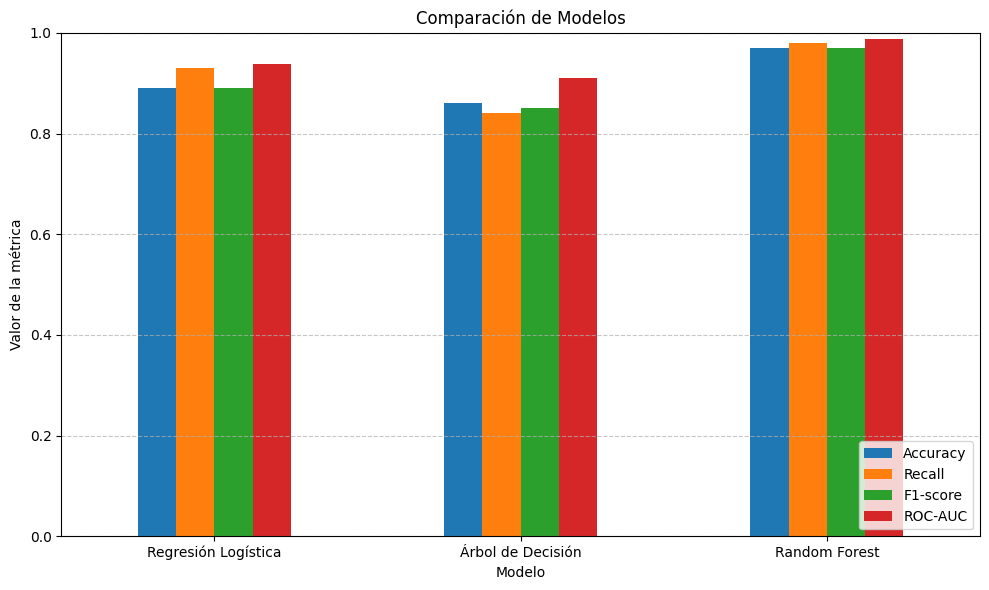

In [41]:
#Metrics Graph:
metrics = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest'],
    'Accuracy': [0.89, 0.86, 0.97],
    'Recall': [0.93, 0.84, 0.98],
    'F1-score': [0.89, 0.85, 0.97],
    'ROC-AUC': [0.938, 0.910, 0.987]
}
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index('Modelo', inplace=True)
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos')
plt.ylabel('Valor de la métrica')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Once the most relevant variables were selected based on the exploratory data analysis (EDA) and the Decision Tree model, and after applying the SMOTE-TOMEK technique to address the imbalance in the target variable, the following results were obtained for the evaluated models:

**Random Forest:**  
- Accuracy: 0.97  
- Recall: 0.98 (for class 1 – churners)  
- F1-score: 0.97 (for class 1 – churners)  
- ROC-AUC: 0.987  

**Logistic Regression:**  
- Accuracy: 0.89  
- Recall: 0.93 (for class 1 – churners)  
- F1-score: 0.89 (for class 1 – churners)  
- ROC-AUC: 0.938  

**Decision Tree:**  
- Accuracy: 0.86  
- Recall: 0.84 (for class 1 – churners)  
- F1-score: 0.85 (for class 1 – churners)  
- ROC-AUC: 0.910  

Random Forest provides the best balance between Recall, F1-Score, Accuracy, and ROC-AUC, outperforming the other models while reducing the risk of overfitting without the need for scaling variables.  

In addition to its high performance, Random Forest offers practical advantages: it reduces the risk of overfitting compared to a single Decision Tree, is less sensitive to class imbalance, and does not require variable scaling, which simplifies and speeds up the data preprocessing process.

**BUSINESS IMPLICATIONS**  

Considering variables such as Complaints, Frequency of Use, Customer Status, and Customer Value, a Random Forest model can predict customer churn with over 95% accuracy, requiring minimal effort in data preprocessing and avoiding overfitting.  

If the model predicts a Churn probability higher than 50%, the company should:  

* Prioritize customer communication to identify and address the root causes of complaints (e.g., via satisfaction surveys through email or phone calls).  
* Promote packages with greater coverage or unlimited calls, offering incentives such as an extended first month at the regular service price, to strengthen customer retention.

Additionally, it is recommended to:  

* Offer discounts in areas with good coverage and improve infrastructure in areas with service issues.  
* Advertise in locations with high service usage (schools, offices, public transportation, etc.) to attract more customers.


**Business Benefits:**  

* Higher number of new customers in areas with better coverage.  
* Reduction in customer churn.  
* Diversification of the customer base by covering larger areas with more potential customers who are likely to use the service more frequently.  
* Personalized service for customers identified as at risk of churn.  
* Improved reputation of the telecommunications service.